## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [12]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [13]:
train, test = keras.datasets.cifar10.load_data()

In [14]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [15]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [16]:
"""Code Here
    建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [17]:
"""Code Here
設定超參數
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.90

In [18]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    #optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=False, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 10s 194us/step - loss: 1.8962 - acc: 0.3143 - val_loss: 1.7759 - val_acc: 0.3677
Epoch 2/50
50000/50000 [==============================] - 8s 170us/step - loss: 1.6804 - acc: 0.3983 - val_loss: 1.6398 - val_acc: 0.4149
Epoch 3/50
50000/50000 [==============================] - 9s 175us/step - loss: 1.5975 - acc: 0.4318 - val_loss: 1.5683 - val_acc: 0.4416
Epoch 4/50
50000/50000 [==============================] - 8s 168us/step - loss: 1.5332 - acc: 0.4548 - val_loss: 1.5366 - val_acc: 0.4597
Epoch 5/50
50000/50000 [==============================] - 9s 182us/step - loss: 1.4930 - acc: 0.4692 - val_loss: 1.5064 - val_acc: 0.4652
Epoch 6/50
50000/50000 [==============================] - 9s 179us/step - loss: 1.4480 - acc: 0.4828 - val_loss: 1.5294 - val_acc: 0.4592
Epoch 7/50
50000/50000 [==============================] - 9s 182us/step - loss: 1.4131 - acc: 0.4978 - val_loss: 1.4648 -

50000/50000 [==============================] - 10s 199us/step - loss: 2.0937 - acc: 0.2583 - val_loss: 1.9511 - val_acc: 0.3199
Epoch 2/50
50000/50000 [==============================] - 9s 179us/step - loss: 1.6080 - acc: 0.4343 - val_loss: 1.6140 - val_acc: 0.4298
Epoch 10/50
50000/50000 [==============================] - 9s 170us/step - loss: 1.5861 - acc: 0.4421 - val_loss: 1.6178 - val_acc: 0.4305
Epoch 11/50
50000/50000 [==============================] - 8s 166us/step - loss: 1.5675 - acc: 0.4497 - val_loss: 1.5682 - val_acc: 0.4514
Epoch 12/50
50000/50000 [==============================] - 9s 188us/step - loss: 1.5475 - acc: 0.4568 - val_loss: 1.5537 - val_acc: 0.4525
Epoch 13/50
50000/50000 [==============================] - 11s 227us/step - loss: 1.5309 - acc: 0.4624 - val_loss: 1.5454 - val_acc: 0.4509
Epoch 14/50
50000/50000 [==============================] - 9s 181us/step - loss: 1.5181 - acc: 0.4668 - val_loss: 1.5616 - val_acc: 0.4517
Epoch 15/50
50000/50000 [=============

50000/50000 [==============================] - 9s 173us/step - loss: 1.8484 - acc: 0.3588 - val_loss: 1.8453 - val_acc: 0.3580
Epoch 17/50
50000/50000 [==============================] - 9s 183us/step - loss: 1.8387 - acc: 0.3604 - val_loss: 1.8355 - val_acc: 0.3617
Epoch 18/50
50000/50000 [==============================] - 9s 172us/step - loss: 1.8303 - acc: 0.3629 - val_loss: 1.8274 - val_acc: 0.3654
Epoch 19/50
50000/50000 [==============================] - 10s 204us/step - loss: 1.8219 - acc: 0.3670 - val_loss: 1.8194 - val_acc: 0.3666
Epoch 20/50
50000/50000 [==============================] - 9s 182us/step - loss: 1.8142 - acc: 0.3684 - val_loss: 1.8124 - val_acc: 0.3684
Epoch 21/50
50000/50000 [==============================] - 9s 180us/step - loss: 1.8071 - acc: 0.3713 - val_loss: 1.8059 - val_acc: 0.3716
Epoch 22/50
50000/50000 [==============================] - 8s 168us/step - loss: 1.8000 - acc: 0.3738 - val_loss: 1.7986 - val_acc: 0.3743
Epoch 23/50
50000/50000 [=============

50000/50000 [==============================] - 9s 184us/step - loss: 2.1917 - acc: 0.2317 - val_loss: 2.1899 - val_acc: 0.2339
Epoch 18/50
50000/50000 [==============================] - 9s 185us/step - loss: 2.1865 - acc: 0.2347 - val_loss: 2.1847 - val_acc: 0.2366
Epoch 19/50
50000/50000 [==============================] - 10s 193us/step - loss: 2.1814 - acc: 0.2371 - val_loss: 2.1795 - val_acc: 0.2384
Epoch 20/50
50000/50000 [==============================] - 10s 193us/step - loss: 2.1763 - acc: 0.2391 - val_loss: 2.1743 - val_acc: 0.2412
Epoch 21/50
50000/50000 [==============================] - 9s 182us/step - loss: 2.1713 - acc: 0.2417 - val_loss: 2.1693 - val_acc: 0.2431
Epoch 22/50
50000/50000 [==============================] - 8s 168us/step - loss: 2.1664 - acc: 0.2446 - val_loss: 2.1644 - val_acc: 0.2444
Epoch 23/50
50000/50000 [==============================] - 9s 170us/step - loss: 2.1616 - acc: 0.2474 - val_loss: 2.1596 - val_acc: 0.2463
Epoch 24/50
50000/50000 [============

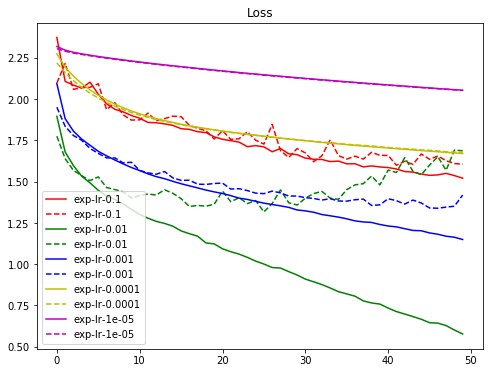

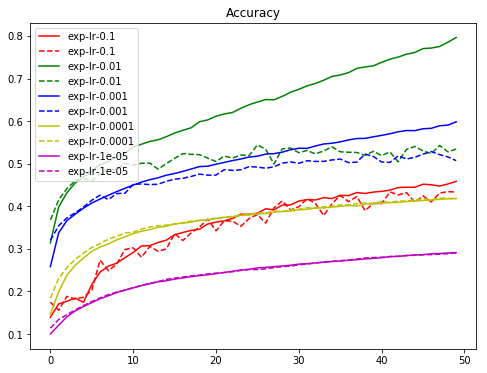

In [19]:
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()